# Project 4
## Conner Cook and Josh Ibad
### CPSC 483-01

## Introduction:
In this project, we will work with several toy datasets to compare the decision boundaries determined by several classifier algorithms.

## Experiment 1:
In order to compare the decision boundaries, we have to load the three datasets we will be using.

In [4]:
# Import the pandas library in order to have the read_csv function
import pandas as pd
# Utilize the read_csv function to read the csv file and save it to df (dataframe)
# The datasets do not have column names, so the names parameters allow us to add them
# use the sep parameter to seperate the columns and rows
df1 = pd.read_csv("dataset1.csv", names=['x1', 'x2', 't'], sep=",")
df1.head()

,x1,x2,t
0,1.800539,-0.539218,0
1,24.330831,26.439146,1
2,21.124114,21.166814,1
3,10.517197,11.175424,0
4,19.737721,23.341138,1


In [5]:
df2 = pd.read_csv("dataset2.csv", names=['x1', 'x2', 't'], sep=",")
df2.head()

,x1,x2,t
0,-1.664407,17.245415,0
1,20.211237,8.599145,1
2,12.675218,23.148375,1
3,17.552831,10.311698,1
4,14.959941,20.225844,1


In [6]:
df3 = pd.read_csv("dataset3.csv", names=['x1', 'x2', 't'], sep=",")
df3.tail()

,x1,x2,t
195,8.029149,17.007334,1
196,11.341650,18.551593,1
197,29.313882,2.027670,0
198,8.122641,20.294774,1
199,28.770680,14.784148,0


## Experiment 1 Conclusion:
We utilized the read_csv method from pandas to read in the data from the three datasets. The three columns of the datasets are: feature x1, feature x2, and a label of 0 or 1. All three datasets have length of 199 entries. 
<hr>

## Experiment 2:
In this experiment, we will fit and score different binary classifiers for dataset 1 to test how accurate each model's predictions are. The three models we will use are logistic regression, gaussian naive bayes, and K-Nearest Neighbors.

In [7]:
# Preproccessing Step
# seperate df1 into features and response
df1_y = df1['t']
df1_x = df1.copy(deep=True)
df1_x = df1_x.drop(columns=['t'])

In [8]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr1 = LogisticRegression()
lr1.fit(df1_x, df1_y)
lr1_pred = lr1.predict(df1_x)

print(f"Logistic Regression Accuracy of Dataset 1: {metrics.accuracy_score(df1_y, lr1_pred)}")

Logistic Regression Accuracy of Dataset 1: 1.0


In [9]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(df1_x, df1_y)
gnb1_pred = gnb1.predict(df1_x)

print(f"Guassian Naive Bayes Accuracy Dataset 1: {metrics.accuracy_score(df1_y, gnb1_pred)}")

Guassian Naive Bayes Accuracy Dataset 1: 1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(df1_x, df1_y)
knn1_pred = knn1.predict(df1_x)

print(f"K-Nearest-Neighbors Accuracy Dataset 1: {metrics.accuracy_score(df1_y, knn1_pred)}")

K-Nearest-Neighbors Accuracy Dataset 1: 1.0


## Experiment 2 Conclusion:
The reason we did not split the dataset into training and test sets is because we are more interested in the classifiers themselves compared to the actual predictions. This resulted in the accuracy score of each classifier to be 100%, and this could be because we didn't split the training and test set.
<hr>

## Experiment 3:
We will repeat experiment 2, but with dataset 2. We are doing this to compare the results between the two datasets to see if we get the same results but with different datasets.

In [11]:
df2_y = df2['t']
df2_x = df2.copy(deep=True)
df2_x = df2_x.drop(columns=['t'])

In [12]:
lr2 = LogisticRegression()
lr2.fit(df2_x, df2_y)
lr2_pred = lr2.predict(df2_x)

print(f"Logistic Regression Accuracy Dataset 2: {metrics.accuracy_score(df2_y, lr2_pred)}")

Logistic Regression Accuracy Dataset 2: 0.525


In [13]:
gnb2 = GaussianNB()
gnb2.fit(df2_x, df2_y)
gnb2_pred = gnb2.predict(df2_x)

# gnb.score(x_train, y_train)
print(f"Guassian Naive Bayes Accuracy Dataset 2: {metrics.accuracy_score(df2_y, gnb2_pred)}")

Guassian Naive Bayes Accuracy Dataset 2: 1.0


In [14]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(df2_x, df2_y)
knn2_pred = knn2.predict(df2_x)

print(f"K-Nearest-Neighbors Accuracy Dataset 2: {metrics.accuracy_score(df2_y, knn2_pred)}")

K-Nearest-Neighbors Accuracy Dataset 2: 1.0


## Experiment 3 Conclusion:
The results are the same between the two datasets except that the result of the Logistic Regression is 52.5%. There is a significant drop from the 100% accuracy of the first dataset. Next we will figure out why there is a huge difference between the two datasets.
<hr>

## Experiment 4:
We will create scatterplots for datasets 1 and 2 in order to visualize the data. Visualizing the data will make it easier to look at the data overall and find the discrepencies that cause the massive drop off of accuracy for the logistic regression classifier.

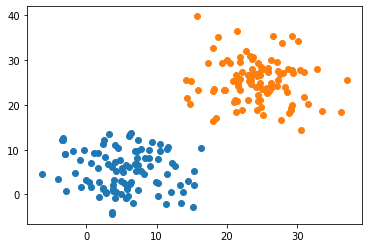

In [15]:
import numpy as np
import matplotlib.pyplot as plt
for val in range(2):
    row_ix = np.where(df1_y == val)[0]
    plt.scatter(df1_x.take(row_ix).x1, df1_x.take(row_ix).x2, cmap='Paired')

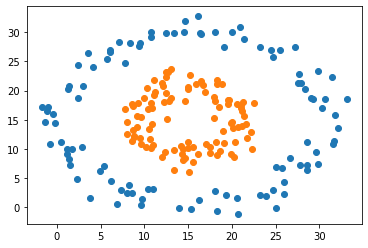

In [16]:
for val in range(2):
    row_ix = np.where(df2_y == val)[0]
    plt.scatter(df2_x.take(row_ix).x1, df2_x.take(row_ix).x2, cmap='Paired')

## Experiment 4 Conclusion:
Overall, the discrepencies between the experiments can be due to the complexity difference in the graph between the two datasets. Dataset 1 has a two clear clusters that seperate the two classes, and a line can go straight in between the two classes without much difficulty. Dataset 2, however, looks like a two ring where the outer ring contains all the points of one class, and the inner ring is contains all the points of the other class. Logistic regression is a linear classifier, so since the scatter plot for dataset 2 has no linear seperations, it makes sense why the logistic regression accuracy did worse. 

## Experiment 5:
We will now repeat for dataset 3 to find out the differences in behavior between the classifiers.

In [17]:
df3_y = df3['t']
df3_x = df3.copy(deep=True)
df3_x = df3_x.drop(columns=['t'])

In [18]:
lr3 = LogisticRegression()
lr3.fit(df3_x, df3_y)
lr3_pred = lr3.predict(df3_x)

print(f"Logistic Regression Accuracy Dataset 3: {metrics.accuracy_score(df3_y, lr3_pred)}")

Logistic Regression Accuracy Dataset 3: 0.87


In [19]:
gnb3 = GaussianNB()
gnb3.fit(df3_x, df3_y)
gnb3_pred = gnb2.predict(df3_x)

print(f"Guassian Naive Bayes Accuracy Dataset 3: {metrics.accuracy_score(df3_y, gnb3_pred)}")

Guassian Naive Bayes Accuracy Dataset 3: 0.675


In [20]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(df3_x, df3_y)
knn3_pred = knn3.predict(df3_x)

print(f"K-Nearest-Neighbors Accuracy Dataset 3: {metrics.accuracy_score(df3_y, knn3_pred)}")

K-Nearest-Neighbors Accuracy Dataset 3: 1.0


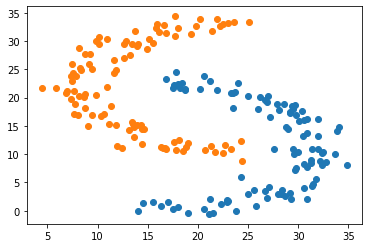

In [21]:
for val in range(2):
    row_ix = np.where(df3_y == val)[0]
    plt.scatter(df3_x.take(row_ix).x1, df3_x.take(row_ix).x2, cmap='Paired')

## Experiment 5 Conclusion:
As you can see from our results, the logistic regression classifier for dataset did better for dataset 3 than dataset 2, the gaussian classifier did worse than the gaussian classifier in dataset 2 and the logistic regression classifier in dataset 3, and the KNN still remains very accurate. 

The reason why the logisitic regression did better for dataset 3 is because you are able imagine a good linear line that seperates the two classes, it is not perfect, but it will be better than dataset 2 because there is no clear line that seperates the two classsifers. 

The reason the guassian classifier did worse was because guassian is based off the normal distribution, which means that it assumes every point has a equal number of measurements above and below the mean. In other words, if the graph looks more symmetric, the guassian classifier should fair better. Looking at dataset 2, all the points seem to be an equal distance from each other in every way, which shows why the accuracy is so high. Dataset 3 is similar to dataset 2 where they are symmetrical, but datasets 3 points aren't symmetrical in the fashion that the points are equal distance from the mean point. It is not a normal distribution, which is why the guassian classifier did worse.

KNN was accurate in all datasets because it does not have the restraint of having to have a linear line to seperate the two classes like logistic regression does, and it does not rely on the normal distribution of points like the guassian distribution does. KNN finds the nearest neighbors and is able to build a successful seperation between the two points because of it.

## Experiment 6:
We will now plot the decision boundaries for each classifier and dataset to help us explain the behavior we witnessed in experiment 5.

In [22]:
# define bounds of the domain by finding the max and min of each feature
#  Dataset 1
df1_min1, df1_max1 = df1_x['x1'].min() - 1, df1_x['x1'].max() + 1
df1_min2, df1_max2 = df1_x['x2'].min() - 1, df1_x['x2'].max() + 1
#  Dataset 2
df2_min1, df2_max1 = df2_x['x1'].min() - 1, df2_x['x1'].max() + 1
df2_min2, df2_max2 = df2_x['x2'].min() - 1, df2_x['x2'].max() + 1
#  Dataset 3
df3_min1, df3_max1 = df3_x['x1'].min() - 1, df3_x['x1'].max() + 1
df3_min2, df3_max2 = df3_x['x2'].min() - 1, df3_x['x2'].max() + 1

# define the x and y scale to create a uniform sample across each dimension
#  Dataset 1
df1_x1grid = np.arange(df1_min1, df1_max1, .1)
df1_x2grid = np.arange(df1_min2, df1_max2, .1)
#  Dataset 2
df2_x1grid = np.arange(df2_min1, df2_max1, .1)
df2_x2grid = np.arange(df2_min2, df2_max2, .1)
#  Dataset 3
df3_x1grid = np.arange(df3_min1, df3_max1, .1)
df3_x2grid = np.arange(df3_min2, df3_max2, .1)

# Now we will combine the two vectors into a grid
#  Dataset 1
df1_xx, df1_yy = np.meshgrid(df1_x1grid, df1_x2grid)
#  Dataset 2
df2_xx, df2_yy = np.meshgrid(df2_x1grid, df2_x2grid)
#  Dataset 3
df3_xx, df3_yy = np.meshgrid(df3_x1grid, df3_x2grid)

# Now we will flatten out the grid to create samples to feed into the model
#  Dataset 1
df1_r1, df1_r2 = df1_xx.flatten(), df1_yy.flatten()
df1_r1, df1_r2 = df1_r1.reshape((len(df1_r1), 1)), df1_r2.reshape((len(df1_r2),1))
#  Dataset 2
df2_r1, df2_r2 = df2_xx.flatten(), df2_yy.flatten()
df2_r1, df2_r2 = df2_r1.reshape((len(df2_r1), 1)), df2_r2.reshape((len(df2_r2),1))
#  Dataset 3
df3_r1, df3_r2 = df3_xx.flatten(), df3_yy.flatten()
df3_r1, df3_r2 = df3_r1.reshape((len(df3_r1), 1)), df3_r2.reshape((len(df3_r2),1))

# Now we will stack the vectors side by side as columns
df1_grid = np.hstack((df1_r1, df1_r2))
df2_grid = np.hstack((df2_r1, df2_r2))
df3_grid = np.hstack((df3_r1, df3_r2))

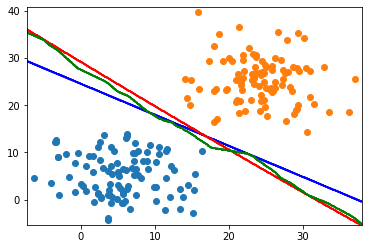

In [23]:
#Fit model and draw scatterplot
#  Dataset 1
#LR
df1_grid_lr = LogisticRegression()
df1_grid_lr.fit(df1_x, df1_y)
df1_grid_lr_pred = df1_grid_lr.predict(df1_grid)
df1_zz = df1_grid_lr_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='blue')
#GNB
df1_grid_gnb = GaussianNB()
df1_grid_gnb.fit(df1_x, df1_y)
df1_grid_gnb_pred = df1_grid_gnb.predict(df1_grid)
df1_zz = df1_grid_gnb_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='red')
#KNN
df1_grid_knn = KNeighborsClassifier(n_neighbors=3)
df1_grid_knn.fit(df1_x, df1_y)
df1_grid_knn_pred = df1_grid_knn.predict(df1_grid)
df1_zz = df1_grid_knn_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='green')
for val in range(2):
    row_ix = np.where(df1_y == val)[0]
    plt.scatter(df1_x.take(row_ix).x1, df1_x.take(row_ix).x2, cmap='Paired')

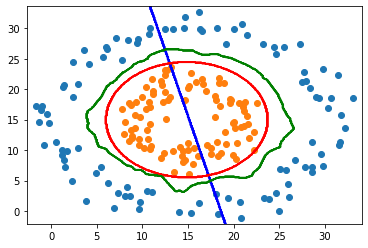

In [24]:
#  Dataset 2
#LR
df2_grid_lr = LogisticRegression()
df2_grid_lr.fit(df2_x, df2_y)
df2_grid_lr_pred = df2_grid_lr.predict(df2_grid)
df2_zz = df2_grid_lr_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='blue')
#GNB
df2_grid_gnb = GaussianNB()
df2_grid_gnb.fit(df2_x, df2_y)
df2_grid_gnb_pred = df2_grid_gnb.predict(df2_grid)
df2_zz = df2_grid_gnb_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='red')
#KNN
df2_grid_knn = KNeighborsClassifier(n_neighbors=3)
df2_grid_knn.fit(df2_x, df2_y)
df2_grid_knn_pred = df2_grid_knn.predict(df2_grid)
df2_zz = df2_grid_knn_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='green')
for val in range(2):
    row_ix = np.where(df2_y == val)[0]
    plt.scatter(df2_x.take(row_ix).x1, df2_x.take(row_ix).x2, cmap='Paired')

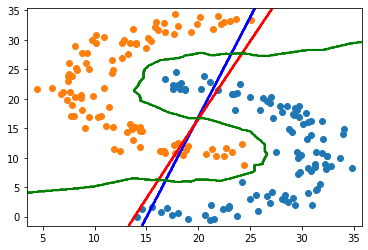

In [25]:
#  Dataset 3
#LR
df3_grid_lr = LogisticRegression()
df3_grid_lr.fit(df3_x, df3_y)
df3_grid_lr_pred = df3_grid_lr.predict(df3_grid)
df3_zz = df3_grid_lr_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='blue')
#GNB
df3_grid_gnb = GaussianNB()
df3_grid_gnb.fit(df3_x, df3_y)
df3_grid_gnb_pred = df3_grid_gnb.predict(df3_grid)
df3_zz = df3_grid_gnb_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='red')
#KNN
df3_grid_knn = KNeighborsClassifier(n_neighbors=3)
df3_grid_knn.fit(df3_x, df3_y)
df3_grid_knn_pred = df3_grid_knn.predict(df3_grid)
df3_zz = df3_grid_knn_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='green')
for val in range(2):
    row_ix = np.where(df3_y == val)[0]
    plt.scatter(df3_x.take(row_ix).x1, df3_x.take(row_ix).x2, cmap='Paired')

## Experiment 6 Conclusion:
Drawing the decision boundaries for each dataset and classifier helps explain the behaviors we saw in experiment 5 because it draws the seperation lines that each classifier has. It helps visualize how each classifier is seperating the two classes, and reen

## Experiment 7:
We will repeat experiment 3, 4, and 6 using Support Vector Machines with linear, polynomial, radial basis function, and sigmoid kernals. We then will compare each kernel and see which kernal was the best and worst in finding appropriate decision boundaries.

In [26]:
from sklearn import svm

#[Repeat Experiment 3]
df2_grid_svc_lin = svm.SVC(kernel='linear')
df2_grid_svc_lin.fit(df2_x, df2_y)
df2_grid_svc_lin_pred = df2_grid_svc_lin.predict(df2_x)
#Polynomial Kernel SVM
df2_grid_svc_poly = svm.SVC(kernel='poly')
df2_grid_svc_poly.fit(df2_x, df2_y)
df2_grid_svc_poly_pred = df2_grid_svc_poly.predict(df2_x)
#Radial Basis Kernel SVM
df2_grid_svm_rbf = svm.SVC(kernel='rbf')
df2_grid_svm_rbf.fit(df2_x, df2_y)
df2_grid_svm_rbf_pred = df2_grid_svm_rbf.predict(df2_x)
#Sigmoid Kernel SVM
df2_grid_svm_sigm = svm.SVC(kernel='sigmoid')
df2_grid_svm_sigm.fit(df2_x, df2_y)
df2_grid_svm_sigm_pred = df2_grid_svm_sigm.predict(df2_x)


print(f"Linear Kernel SVM Dataset 2: {metrics.accuracy_score(df2_y, df2_grid_svc_lin_pred)}")
print(f"Polynomial Kernel SVM Dataset 2: {metrics.accuracy_score(df2_y, df2_grid_svc_poly_pred)}")
print(f"Radial Basis Kernel SVM Dataset 2: {metrics.accuracy_score(df2_y, df2_grid_svm_rbf_pred)}")
print(f"Sigmoid Kernel SVM Dataset 2: {metrics.accuracy_score(df2_y, df2_grid_svm_sigm_pred)}")

Linear Kernel SVM Dataset 2: 0.62
Polynomial Kernel SVM Dataset 2: 0.815
Radial Basis Kernel SVM Dataset 2: 1.0
Sigmoid Kernel SVM Dataset 2: 0.42


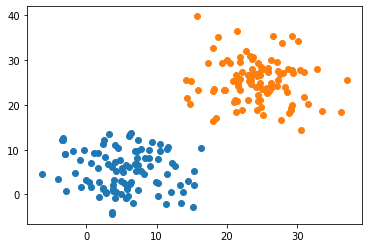

In [27]:
#[Repeat Experiment 4]
for val in range(2):
    row_ix = np.where(df1_y == val)[0]
    plt.scatter(df1_x.take(row_ix).x1, df1_x.take(row_ix).x2, cmap='Paired')

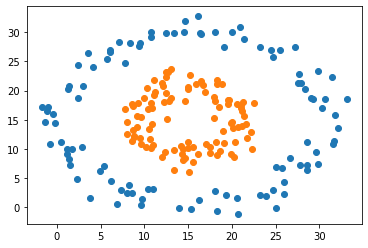

In [28]:
for val in range(2):
    row_ix = np.where(df2_y == val)[0]
    plt.scatter(df2_x.take(row_ix).x1, df2_x.take(row_ix).x2, cmap='Paired')

In [29]:
#[Repeat Experiment 6]
#Fit models SVM with Linear, Poly, RBF, and Sigmoid kernels, to Dataset 1, 2, and 3
#  Dataset 1
#Lienar Kernel SVM
df1_grid_svc_lin = svm.SVC(kernel='linear')
df1_grid_svc_lin.fit(df1_x, df1_y)
df1_grid_svc_lin_pred = df1_grid_svc_lin.predict(df1_grid)
#Polynomial Kernel SVM
df1_grid_svc_poly = svm.SVC(kernel='poly')
df1_grid_svc_poly.fit(df1_x, df1_y)
df1_grid_svc_poly_pred = df1_grid_svc_poly.predict(df1_grid)
#Radial Basis Kernel SVM
df1_grid_svm_rbf = svm.SVC(kernel='rbf')
df1_grid_svm_rbf.fit(df1_x, df1_y)
df1_grid_svm_rbf_pred = df1_grid_svm_rbf.predict(df1_grid)
#Sigmoid Kernel SVM
df1_grid_svm_sigm = svm.SVC(kernel='sigmoid')
df1_grid_svm_sigm.fit(df1_x, df1_y)
df1_grid_svm_sigm_pred = df1_grid_svm_sigm.predict(df1_grid)

#  Dataset 2
#Lienar Kernel SVM
df2_grid_svc_lin = svm.SVC(kernel='linear')
df2_grid_svc_lin.fit(df2_x, df2_y)
df2_grid_svc_lin_pred = df2_grid_svc_lin.predict(df2_grid)
#Polynomial Kernel SVM
df2_grid_svc_poly = svm.SVC(kernel='poly')
df2_grid_svc_poly.fit(df2_x, df2_y)
df2_grid_svc_poly_pred = df2_grid_svc_poly.predict(df2_grid)
#Radial Basis Kernel SVM
df2_grid_svm_rbf = svm.SVC(kernel='rbf')
df2_grid_svm_rbf.fit(df2_x, df2_y)
df2_grid_svm_rbf_pred = df2_grid_svm_rbf.predict(df2_grid)
#Sigmoid Kernel SVM
df2_grid_svm_sigm = svm.SVC(kernel='sigmoid')
df2_grid_svm_sigm.fit(df2_x, df2_y)
df2_grid_svm_sigm_pred = df2_grid_svm_sigm.predict(df2_grid)

#  Dataset 3
#Lienar Kernel SVM
df3_grid_svc_lin = svm.SVC(kernel='linear')
df3_grid_svc_lin.fit(df3_x, df3_y)
df3_grid_svc_lin_pred = df3_grid_svc_lin.predict(df3_grid)
#Polynomial Kernel SVM
df3_grid_svc_poly = svm.SVC(kernel='poly')
df3_grid_svc_poly.fit(df3_x, df3_y)
df3_grid_svc_poly_pred = df3_grid_svc_poly.predict(df3_grid)
#Radial Basis Kernel SVM
df3_grid_svm_rbf = svm.SVC(kernel='rbf')
df3_grid_svm_rbf.fit(df3_x, df3_y)
df3_grid_svm_rbf_pred = df3_grid_svm_rbf.predict(df3_grid)
#Sigmoid Kernel SVM
df3_grid_svm_sigm = svm.SVC(kernel='sigmoid')
df3_grid_svm_sigm.fit(df3_x, df3_y)
df3_grid_svm_sigm_pred = df3_grid_svm_sigm.predict(df3_grid)

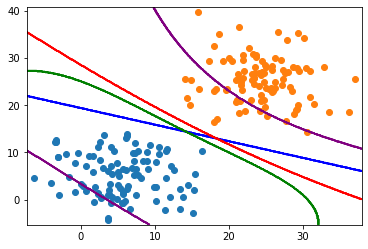

In [30]:
#Draw scatterplot
df1_zz = df1_grid_svc_lin_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='blue')
df1_zz = df1_grid_svc_poly_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='red')
df1_zz = df1_grid_svm_rbf_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='green')
df1_zz = df1_grid_svm_sigm_pred.reshape(df1_xx.shape)
plt.contour(df1_xx, df1_yy, df1_zz, colors='purple')
for val in range(2):
    row_ix = np.where(df1_y == val)[0]
    plt.scatter(df1_x.take(row_ix).x1, df1_x.take(row_ix).x2, cmap='Paired')

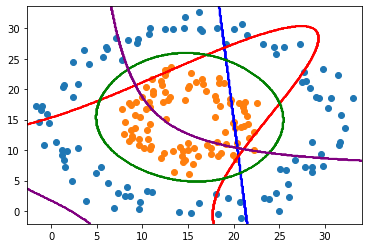

In [31]:
#Draw scatterplot
df2_zz = df2_grid_svc_lin_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='blue')
df2_zz = df2_grid_svc_poly_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='red')
df2_zz = df2_grid_svm_rbf_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='green')
df2_zz = df2_grid_svm_sigm_pred.reshape(df2_xx.shape)
plt.contour(df2_xx, df2_yy, df2_zz, colors='purple')
for val in range(2):
    row_ix = np.where(df2_y == val)[0]
    plt.scatter(df2_x.take(row_ix).x1, df2_x.take(row_ix).x2, cmap='Paired')

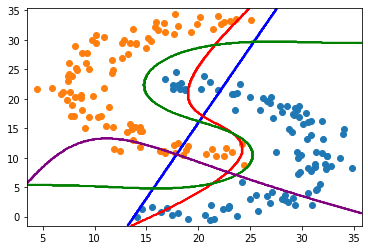

In [32]:
#Draw scatterplot
df3_zz = df3_grid_svc_lin_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='blue')
df3_zz = df3_grid_svc_poly_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='red')
df3_zz = df3_grid_svm_rbf_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='green')
df3_zz = df3_grid_svm_sigm_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='purple')
for val in range(2):
    row_ix = np.where(df3_y == val)[0]
    plt.scatter(df3_x.take(row_ix).x1, df3_x.take(row_ix).x2, cmap='Paired')

## Experiment 7 Conclusion:
Based off our results, the worst kernel for finding the decision boundaries was the sigmoid kernel (purple line) because in all three graphs the decision boundary failed to seperate any of the classes correctly. A close second worst kernel was the linear kernel (blue line). To be fair, the linear and sigmoid kernels are very comparable in how ineffective they are, the only reason linear is slightly better was because linear kernel was able to seperate the two classes for dataset 1, while the sigmoid kernel did not. The second best kernel was the polynomial kernel, and the overall best was the radial basis kernel. The radial basis was not perfect, but it had a noticable difference compared to all the kernels of how accurate it was.

## Experiment 8:
We are now gonna focus on dataset 3 since its a pretty hard dataset to fit. The polynomial kernel uses a default degree of 3, but we are gonna try to change the degree in order to find a better fit. In this experiment, we will explore the different kernels of degree up to 10 and find which produces the best score.

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('poly',), 'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(df3_x, df3_y)

print(f"Best polynomial kernel SVM estimator:\n   {clf.best_estimator_}")
print(f"Best estimator's score:\n   {clf.best_score_}")

Best polynomial kernel SVM estimator:
   SVC(C=10, kernel='poly')
Best estimator's score:
   0.97


## Experiment 8 Conclusion:
According to our predictions, polynomial degree of 10 produced the best score of 0.97.

## Experiment 9:
We will know plot the decsion boundary of the polynomial kernel of degree 10, and compare it to the decision boundary we foind in experiment 7. 

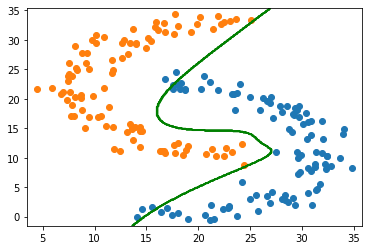

In [34]:
#Fit polynomial kernel SVM with degree corresponding to best model from Experiment 8
df3_grid_svc_lin = svm.SVC(kernel='poly', degree=clf.best_estimator_.C)
df3_grid_svc_lin.fit(df3_x, df3_y)
df3_grid_svc_lin_pred = df3_grid_svc_lin.predict(df3_grid)#Draw scatterplot
df3_zz = df3_grid_svc_lin_pred.reshape(df3_xx.shape)
plt.contour(df3_xx, df3_yy, df3_zz, colors='green')
for val in range(2):
    row_ix = np.where(df3_y == val)[0]
    plt.scatter(df3_x.take(row_ix).x1, df3_x.take(row_ix).x2, cmap='Paired')

## Experiment 9 Conclusion:
By comparing the two decision boundaries, we can defintely tell the difference in performance between the two decision boundaries. In experiment 7, the decision boundary for polynomial kernels (red line) does not effectively seperate the two classes as effectively as the decision boundary from experiment 8. There are big chunks of datapoints that are not in the right side of the decision boundary in experiment 7, but in experiment 8, there are less points that are on the wrong side. 